In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:/NareshiTech/insurance_prediction/maindata/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
print(df.describe())

               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


In [6]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

In [7]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
expenses    1338
dtype: int64

In [11]:
df.shape

(1338, 7)

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [9]:
continuous_variables=df[['bmi','expenses']]
discrete_count=df[['age','children']]
discrete_categorical=df[['sex','smoker','region']]

In [10]:
df.duplicated().sum()

1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
df.nunique(axis=0)

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

# EDA:-

In [15]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [16]:
df['age'].shape

(1338,)

In [17]:
df['age'].isnull().sum()

0

In [18]:
df['age'].skew()

0.05567251565299186

In [19]:
df['age'].std(ddof=0)

14.044709038954522

In [20]:
df['age'].var(ddof=0)

197.2538519888909

In [21]:
df[df['age']==0]

,age,sex,bmi,children,smoker,region,expenses


In [22]:
len(df['age'].unique())

47

In [23]:
df[['age','expenses']].corr()

,age,expenses
age,1.000000,0.299008
expenses,0.299008,1.000000


In [43]:
df[(df['age']>=18) & (df['age']<=40) & (df['expenses']>13270)][['age','expenses']].count()

age         188
expenses    188
dtype: int64

In [44]:
df[(df['age']>=40) & (df['age']<=50) & (df['expenses']>13270)][['age','expenses']].count()

age         86
expenses    86
dtype: int64

In [45]:
df[(df['age']>=50) & (df['age']<60) & (df['expenses']>13270)][['age','expenses']].count()

age         74
expenses    74
dtype: int64

In [46]:
df[(df['age']>=60) & (df['age']<70) & (df['expenses']>13270)][['age','expenses']].count()

age         87
expenses    87
dtype: int64

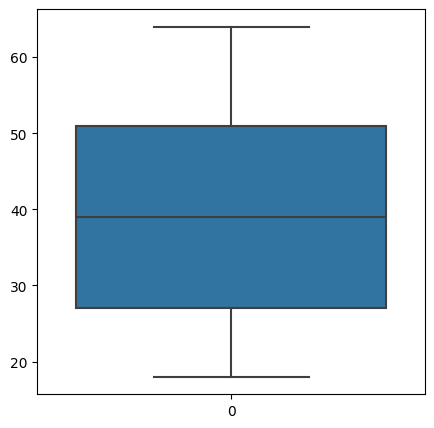

In [26]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['age'],ax=ax)
plt.show()

C:\Users\manoj\AppData\Local\Temp\ipykernel_8696\2611841739.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],ax=ax)
e:\NareshiTech\insurance_prediction\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


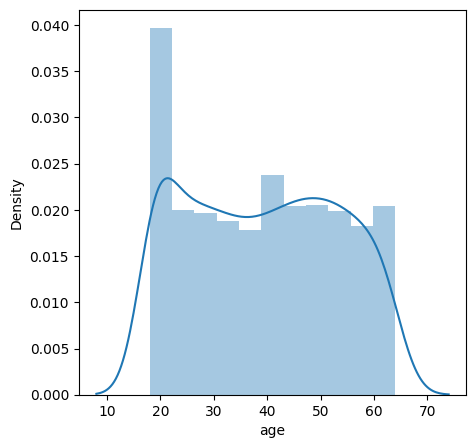

In [27]:
fig,ax=plt.subplots(figsize=(5,5))
sns.distplot(df['age'],ax=ax)
plt.show()

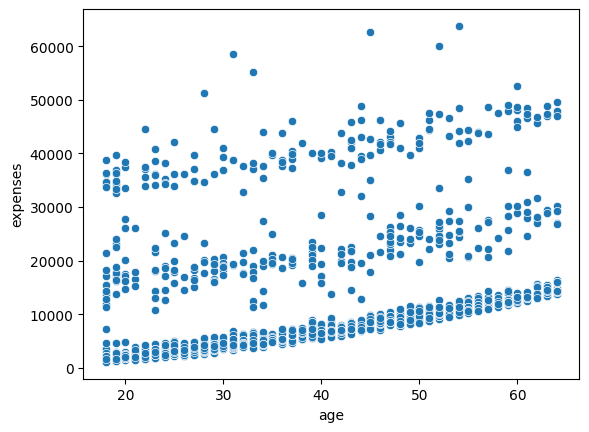

In [28]:
sns.scatterplot(data=df,x='age',y='expenses')
plt.show()

e:\NareshiTech\insurance_prediction\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\NareshiTech\insurance_prediction\env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\NareshiTech\insurance_prediction\env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\NareshiTech\insurance_prediction\env\lib\site-packages\seabo

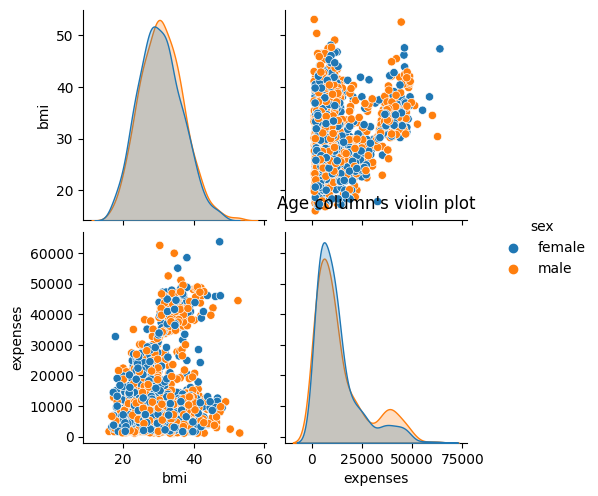

In [29]:
sns.pairplot(data=df,vars=continuous_variables,hue='sex')
plt.title("Age column's violin plot")
plt.show()

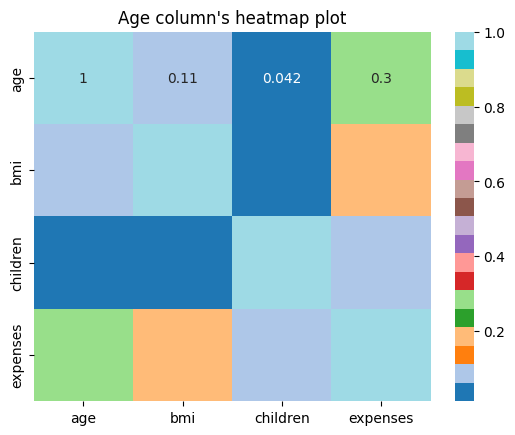

In [33]:
sns.heatmap(data=df[['age','bmi','children','expenses']].corr(),cmap='tab20',annot=True)  # type: ignore
plt.title("Age column's heatmap plot")
plt.show()

In [34]:
df.rename(columns={'sex':'gender'},inplace=True)
df

,age,gender,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [35]:
df['gender'].unique().tolist()

['female', 'male']

In [36]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [37]:
pd.crosstab(df['gender'],df['smoker'],margins=True)

smoker,no,yes,All
gender,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [38]:
df['gender'].isnull().sum()

0

In [39]:
df[(df['gender']=='female') & (df['smoker']=='yes')][['gender','smoker']].count()

gender    115
smoker    115
dtype: int64

In [40]:
df[(df['gender']=='female') & (df['smoker']=='no')][['gender','smoker']].count()

gender    547
smoker    547
dtype: int64

In [41]:
df[(df['gender']=='male') & (df['smoker']=='yes')][['gender','smoker']].count()

gender    159
smoker    159
dtype: int64

In [42]:
df[(df['gender']=='male') & (df['smoker']=='no')][['gender','smoker']].count()

gender    517
smoker    517
dtype: int64

In [47]:
df[(df['gender']=='female') & (df['smoker']=='yes') & (df['expenses']>13270)][['gender','expenses']].count()

gender      115
expenses    115
dtype: int64